In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

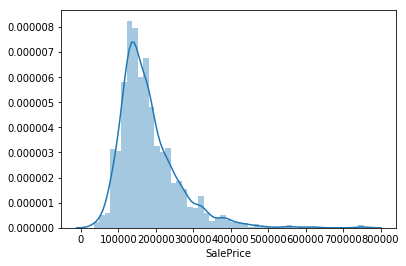

In [5]:
sns.distplot(train['SalePrice']);

### we should know about the mu and sigma values of the dataset

In [6]:
(mu, sigma) = stats.norm.fit(train['SalePrice'])

In [7]:
print(mu)
print(sigma)

180921.19589041095
79415.29188606751


### we have to know about the null values which are present in our dataset so we can handle with the missing values and what are the percentages of missing value in that column

In [8]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
percentNull = (train.isnull().sum()/len(train))*100

In [10]:
percentNull.sort_values(ascending=False, inplace=True)

In [11]:
percentNull.columns = ['count']
percentNull.index.names= ['Name']

In [12]:
train.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [13]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## now we have to treat the outliers by keeping a seperate function which will accept the dataframe with numeric values 

In [14]:
trainNumericColumns = train.select_dtypes(include= ['float64','int64'])

In [15]:
trainNumericColumns.shape

(1460, 38)

In [16]:
def outlierRemovalinNumericColumns(dataFrame, ListOfNumericColumns):
    for j in ListOfNumericColumns:
        QuantileOne = dataFrame[j].quantile(0.01)
        QuantileTwo = dataFrame[j].quantile(0.99)
        IQR = QuantileOne - QuantileTwo       
        dtf = dataFrame[(dataFrame[j] >= QuantileOne-1.5*IQR) & (dataFrame[j] <= QuantileTwo+1.5*IQR)]
    return dataFrame    

In [17]:
ListOfNumericColumns = list(trainNumericColumns.columns)

In [18]:
train = outlierRemovalinNumericColumns(train,ListOfNumericColumns)

In [19]:
train.shape

(1460, 81)

#### we have to find the co-relation between the numeric and salesPrice so In order to find the most Important variables

In [20]:
train =train.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',45:'1-1/2 STORY - UNFINISHED ALL AGES',50:'1-1/2 STORY FINISHED ALL AGES',60:'2-STORY 1946 & NEWER',70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',80:'SPLIT OR MULTI-LEVEL',85:'SPLIT FOYER',90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',150:'1-1/2 STORY PUD - ALL AGES',160:'2-STORY PUD - 1946 & NEWER',180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [21]:
df_corr = train.select_dtypes(include=[np.number])

In [22]:
df_corr.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [23]:
#now we got to know that there are 38 numerical attributes and now
#we have to fnd the most related attributes 
#creating the object for co-relation
corr = df_corr.corr()

In [24]:
relatedAttribute = corr.index[abs(corr['SalePrice']>0.3)]

In [25]:
relatedAttribute

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [26]:
corr.sort_values(['SalePrice'],ascending=False, inplace=True)
corr.SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

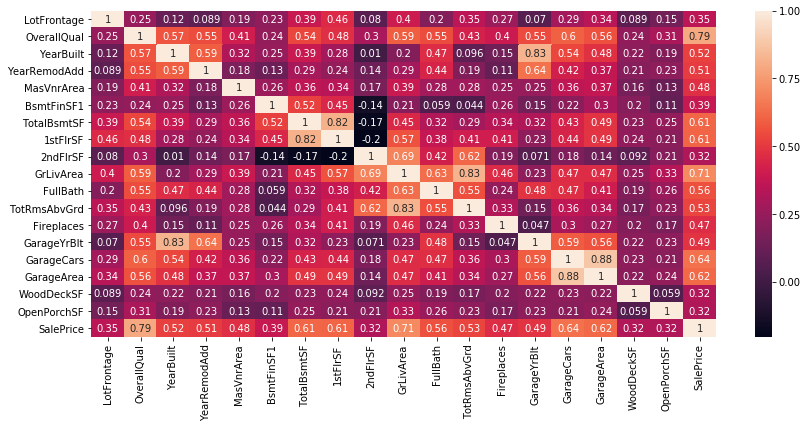

In [27]:
plt.subplots(figsize=(14, 6))
corMatrix = train[relatedAttribute].corr()
sns.heatmap(corMatrix, annot=True)
plt.show()

### treating Null values by imputing and by removing some of them

In [28]:
#these are the percentage of null values present in our data-set
percentNull

Name
PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000

In [29]:
del train['PoolQC']
del train['MiscFeature']
del train['Alley']
del train['Id']

In [30]:
train.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [31]:
train['Fence'].fillna('No Fence',inplace =True)

In [32]:
train.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [33]:
train['FireplaceQu'].fillna('NoFirePlace',inplace =True)

In [34]:
train.LotFrontage.isnull().sum()

259

#### in the describe we have seen that the minimum value for LotFrontage variable was 21 so we can impute these NAN value with 21

In [35]:
train['LotFrontage'].fillna(21,inplace =True)

#### we can see that the null percentage in columns  GarageType, GarageFinish, GarageQual, GarageCond  are same . It indicates that there is no Garage available so we can Impute the NAN values with NOGarageAvailable

In [36]:
train['GarageType'].fillna('No Garage', inplace=True) 
train['GarageFinish'].fillna('No Garage', inplace=True) 
train['GarageQual'].fillna('No Garage', inplace=True) 
train['GarageCond'].fillna('No Garage', inplace=True) 

In [37]:
train.BsmtFinSF1.isnull().sum()

0

In [38]:
train.BsmtExposure.isnull().sum()        

38

In [39]:
train.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [40]:
train.BsmtCond.value_counts()                   

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [41]:
train.BsmtCond.isnull().sum()

37

In [42]:
train.BsmtQual.isnull().sum()             

37

In [43]:
train['BsmtCond'].fillna('NoBsmtCondition', inplace=True) 
train['BsmtExposure'].fillna('NoBsmtExposure', inplace=True) 
train['BsmtQual'].fillna('NoBsmtQual', inplace=True)

In [44]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,No Fence,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,No Fence,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,No Fence,0,9,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,No Fence,0,12,2008,WD,Normal,250000


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 n

In [46]:
train.SalePrice.isnull().sum()

0

In [47]:
train.shape

(1460, 77)

### modifying the year column in actual count of years rather than the year mentioned

In [48]:
train.YearBuilt = 2020- train.YearBuilt
train.YearRemodAdd = 2020 - train.YearRemodAdd
train.GarageYrBlt = 2020- train.GarageYrBlt
train.YrSold = 2020- train.YrSold

In [49]:
train_categorical = train.select_dtypes(include=['object'])

In [50]:
train_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,NoFirePlace,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
2,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
3,2-STORY 1945 & OLDER,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,No Fence,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal


In [51]:
# train_categorical[train_categorical.isna().any(axis=1)]
train_categorical.columns[train_categorical.isna().any()].tolist()

['MasVnrType', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']

#### these 4 columns have nan Values

In [52]:
train_categorical['MasVnrType'].fillna('NoMasVnrType',inplace =True)

In [53]:
train_categorical['BsmtFinType1'].fillna('NoBasement',inplace =True)

In [54]:
train_categorical['BsmtFinType2'].fillna('NoBasement',inplace =True)
train_categorical['Electrical'].fillna('NoElectricity',inplace =True)

In [55]:
train_categorical[train_categorical.isna().any(axis=1)]

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition


In [56]:
train_categorical.shape

(1460, 41)

In [57]:
train_dummies = pd.get_dummies(train_categorical,drop_first=True)
train_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [58]:
train = train.drop(list(train_categorical.columns),axis=1)

In [59]:
# concat dummy variables with train dataframe
train = pd.concat([train,train_dummies], axis=1)

In [60]:
train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,17,17,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,44,44,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,19,18,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,105,50,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,20,20,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [61]:
X = train

In [62]:
# concat dummy variables with train dataframe
# X = pd.concat([X,train_dummies], axis=1)

In [63]:
X.isnull().values.sum()

89

In [64]:
null_columns=X.columns[X.isnull().any()]

In [65]:
X[null_columns].isnull().sum()

MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [66]:
X.MasVnrArea.isnull().sum()
X['MasVnrArea'].fillna((X['MasVnrArea'].median()),inplace =True)

In [67]:
X['GarageYrBlt'].fillna((X['GarageYrBlt'].median()),inplace =True)

In [68]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,17,17,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,44,44,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,19,18,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,105,50,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,20,20,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [69]:
# y = train['SalePrice']/

In [70]:
train = X

In [71]:
from sklearn.model_selection import train_test_split

data_train,data_test=train_test_split(train,train_size=0.80, random_state=100)
data_train.shape
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

(1168, 266)

In [72]:
y_train = np.log(data_train.SalePrice)
X_train = data_train.drop("SalePrice",1)

y_test= np.log(data_test.SalePrice)
X_test = data_test.drop("SalePrice",1)

#### we have to handle the numeric variables for standardization which in our case is int64 and float64

In [73]:
intColumns= X.select_dtypes(include=['float64','int64']).columns

In [74]:
intColumns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [75]:

intColumns =['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[intColumns] = scaler.fit_transform(X_train[intColumns])
X_test[intColumns] = scaler.transform(X_test[intColumns])

In [77]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,25)
rfe=rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GrLivArea', 'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Utilities_NoSeWa', 'Condition2_PosN', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'BsmtExposure_Gd', 'KitchenQual_Fa', 'KitchenQual_TA', 'Functional_Sev',
       'GarageType_No Garage', 'GarageCond_Po'],
      dtype='object')

In [78]:
X_train[col].columns

Index(['OverallQual', 'GrLivArea', 'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Utilities_NoSeWa', 'Condition2_PosN', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'BsmtExposure_Gd', 'KitchenQual_Fa', 'KitchenQual_TA', 'Functional_Sev',
       'GarageType_No Garage', 'GarageCond_Po'],
      dtype='object')

In [79]:
X_train[col].head()

,OverallQual,GrLivArea,MSSubClass_2-STORY PUD - 1946 & NEWER,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_NoSeWa,Condition2_PosN,RoofMatl_CompShg,...,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior2nd_AsphShn,BsmtExposure_Gd,KitchenQual_Fa,KitchenQual_TA,Functional_Sev,GarageType_No Garage,GarageCond_Po
133,1.376896,-0.428561,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
290,1.376896,0.758017,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24,-0.795388,-0.878051,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1093,-0.795388,-0.611404,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1288,1.376896,0.262816,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [80]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [81]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cvRidge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cvRidge.fit(X_train[col], y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [82]:
print(model_cvRidge.best_params_)
print(model_cvRidge.best_score_)

{'alpha': 2.0}
-0.125561432772055


In [83]:
print('Lasso Regression: R^2 score on training set', model_cvRidge.score(X_train[col], y_train)*100)
print('Lasso Regression: R^2 score on test set', model_cvRidge.score(X_test[col], y_test)*100)

Lasso Regression: R^2 score on training set -12.156780407229133
Lasso Regression: R^2 score on test set -11.944357850571846


In [84]:
cv_results = pd.DataFrame(model_cvRidge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003656,0.003481,0.001186,0.000254,0.0001,{'alpha': 0.0001},-0.133039,-0.132948,-0.129083,-0.133751,...,-0.128108,0.008366,24,-0.113898,-0.116626,-0.118565,-0.118120,-0.119663,-0.117374,0.001993
1,0.002024,0.000035,0.000813,0.000479,0.001,{'alpha': 0.001},-0.133021,-0.132900,-0.129082,-0.133703,...,-0.128086,0.008350,23,-0.113914,-0.116639,-0.118567,-0.118132,-0.119679,-0.117386,0.001991
2,0.001785,0.000550,0.000847,0.000218,0.01,{'alpha': 0.01},-0.132854,-0.132452,-0.129078,-0.133253,...,-0.127878,0.008207,22,-0.114061,-0.116770,-0.118589,-0.118242,-0.119829,-0.117498,0.001976
3,0.002183,0.000477,0.000586,0.000485,0.05,{'alpha': 0.05},-0.132292,-0.130963,-0.129062,-0.131752,...,-0.127220,0.007684,21,-0.114609,-0.117267,-0.118685,-0.118653,-0.120391,-0.117921,0.001930
4,0.001647,0.000329,0.001033,0.000127,0.1,{'alpha': 0.1},-0.131841,-0.129837,-0.129042,-0.130569,...,-0.126736,0.007242,19,-0.115128,-0.117747,-0.118796,-0.119056,-0.120886,-0.118323,0.001890


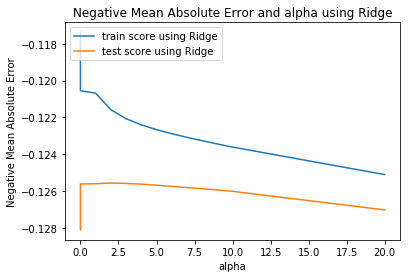

In [85]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Plotting Negative Mean Absolute Error using Ridge')
plt.title("Negative Mean Absolute Error and alpha using Ridge")
plt.legend(['train score using Ridge', 'test score using Ridge'], loc='upper left')
plt.show()

In [86]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[col], y_train)
ridge.coef_

array([ 0.1765623 ,  0.12893655, -0.14178847,  0.29496679,  0.15952607,
        0.26380504,  0.08232579, -0.0762194 , -0.47126981,  0.19231192,
        0.11744776,  0.09278971,  0.0184162 ,  0.13222691,  0.07573039,
        0.1723535 , -0.20406752, -0.04705071, -0.08066067,  0.15088354,
       -0.19198367, -0.10884129, -0.12598639, -0.14702486, -0.14205808])

### Now we also need to get topFeatures which we can provide to Business

In [87]:
importantRidgeCoefficient = ridge.coef_

Feature : 0 , Score:0.17656
Feature : 1 , Score:0.12894
Feature : 2 , Score:-0.14179
Feature : 3 , Score:0.29497
Feature : 4 , Score:0.15953
Feature : 5 , Score:0.26381
Feature : 6 , Score:0.08233
Feature : 7 , Score:-0.07622
Feature : 8 , Score:-0.47127
Feature : 9 , Score:0.19231
Feature : 10 , Score:0.11745
Feature : 11 , Score:0.09279
Feature : 12 , Score:0.01842
Feature : 13 , Score:0.13223
Feature : 14 , Score:0.07573
Feature : 15 , Score:0.17235
Feature : 16 , Score:-0.20407
Feature : 17 , Score:-0.04705
Feature : 18 , Score:-0.08066
Feature : 19 , Score:0.15088
Feature : 20 , Score:-0.19198
Feature : 21 , Score:-0.10884
Feature : 22 , Score:-0.12599
Feature : 23 , Score:-0.14702
Feature : 24 , Score:-0.14206


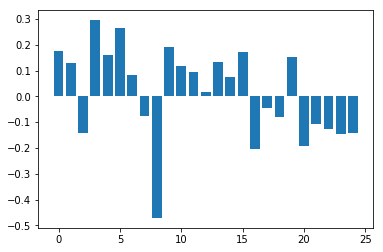

In [88]:
from matplotlib import pyplot as pl
for i,j in enumerate(importantRidgeCoefficient):
    print('Feature : %0d , Score:%.5f' %(i,j))
    
pl.bar([x for x in range(len(importantRidgeCoefficient))],importantRidgeCoefficient)
pl.show()

### Performing lasso on the same transformed model

In [89]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


# cross validation
model_cvLasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cvLasso.fit(X_train[col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [90]:
print('Lasso Regression: R^2 score on training set', model_cvLasso.score(X_train[col], y_train)*100)
print('Lasso Regression: R^2 score on test set', model_cvLasso.score(X_test[col], y_test)*100)

Lasso Regression: R^2 score on training set -12.40324653041621
Lasso Regression: R^2 score on test set -11.730960330737748


In [91]:
print(model_cvLasso.best_params_)
print(model_cvLasso.best_score_)

{'alpha': 0.001}
-0.12624162516336843


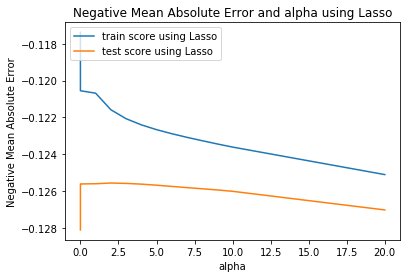

In [92]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error using Lasso')

plt.title("Negative Mean Absolute Error and alpha using Lasso")
plt.legend(['train score using Lasso', 'test score using Lasso'], loc='upper left')
plt.show()

In [93]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[col], y_train)
lasso.coef_

array([ 0.18322622,  0.12476857, -0.11698186,  0.1755762 ,  0.        ,
        0.1658561 , -0.01270125, -0.        , -0.22106822,  0.04083059,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.13754746,
       -0.18068792, -0.10394714, -0.        , -0.1305238 , -0.01425621])